## Assignment 1 Getting your Feet Wet with Coding for Data Analysis and Modeling


### The purpose of this assignment is to get started coding!  Its alright if you have struggles, if you ask your classmates or me.  
### I am available on the Discord Server in the Professors corner and of course by email and in class. 

###  Deadline: Wednesday 10/11 at midnight. 

### Problem #1 
#### Make an array x containing 200 random numbers (samples) drawn from a normal distribution with a mean of 0.25 and a standard deviation of and plot a histogram. Don't forget to set the random number seed.  



[ 2.07675656e+00 -2.82833191e+00  1.20806398e+00  3.19637228e-01
  1.56825002e+00  6.35629250e-01  2.07725863e+00  2.81743759e-01
 -2.66229444e-01  8.30484921e-01  6.82106861e-01 -1.06839357e-01
  2.69617801e-03  9.69440678e-01  9.54315994e-01 -2.43934230e-01
 -1.17713724e-01 -1.55679039e+00  1.92920747e+00  2.57091216e-02
  1.58727743e+00  6.67465594e-01  2.19396277e+00  1.78710998e+00
  5.68298439e-01  1.73076342e+00 -7.00123522e-01  1.50861814e+00
 -1.23042363e+00  5.93236368e-01  1.31487647e+00  4.73632142e-01
 -1.17137497e-01 -5.55560045e-01 -9.28000151e-02  1.30112514e+00
  1.14083945e+00 -1.21314630e-02 -9.96004347e-01  9.23997242e-01
 -1.19987394e+00 -2.80854905e-01 -4.84828377e-01  9.93265210e-01
  4.85949741e-01  7.11854732e-01  5.22407910e-01 -4.27930116e-01
  7.85475983e-01  1.66246037e+00  2.13228757e-01  8.83594464e-01
  1.24096807e-01  1.27855543e+00  9.16636652e-01  1.12581947e+00
  5.98422996e-01  1.89000388e+00 -1.11150579e-01 -8.41660772e-02
 -3.41859984e-01  8.60962

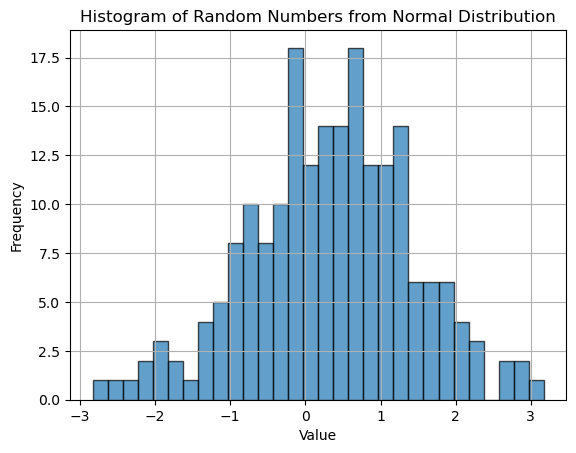

In [1]:
from numpy import random
import matplotlib.pyplot as plt

# Set the seed for the random number generator
myseed = 13

# Create the random number generator object
rng = random.default_rng(seed = myseed)

# Define mean and standard deviation
mean = 0.25
std_dev = 1

# Create array
x = rng.normal(mean,std_dev,200)
print(x)
plt.hist(x, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Random Numbers from Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Problem #2  
#### Find the mean, median, 25%, 75% and standard deviation of the array you created in Problem 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x = rng.normal(mean,std_dev,200)
mean_value = np.mean(x)
median_value = np.median(x)
std_dev = np.std(x)
q25 = np.percentile(x, 25)
q75 = np.percentile(x, 75)
print("Mean:", mean_value)
print("Median:", median_value)
print("25th Percentile:", q25)
print("75th Percentile:", q75)
print("Standard Deviation:", std_dev)

Mean: 0.18152353211317837
Median: 0.24206132091713278
25th Percentile: -0.4170015643668419
75th Percentile: 0.8018649688989348
Standard Deviation: 1.011790273954607


### Problem #3 
#### Compute the cumulative sum of the array x (there is a numpy function that does htis) and store it in a variable w.  Make a plot of the number of samples versus w. 

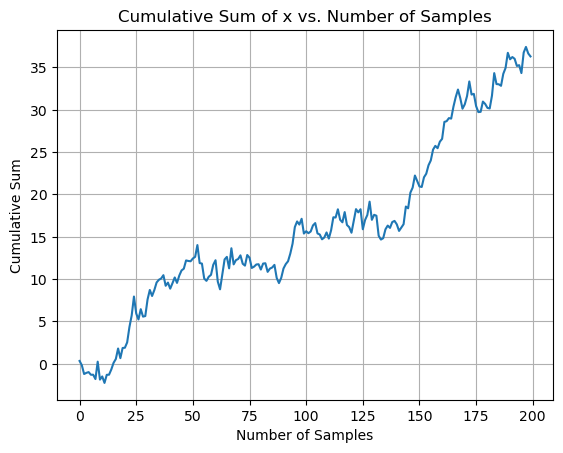

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the cumulative sum
w = np.cumsum(x)
plt.plot(w)
plt.xlabel('Number of Samples')
plt.ylabel('Cumulative Sum')
plt.title('Cumulative Sum of x vs. Number of Samples')
plt.grid(True)
plt.show()

### Problem #4 
#### Find the sample number where w first exceeds 10. Save this to a variable called rt.  NOTE: There exceeds a remote possibility that you never cross 10 in 200 samples.  If this happens increase the number of samples from 200 to 300.  

In [4]:
import numpy as np
from numpy import random

# Set the seed for the random number generator
myseed = 13

# Create the random number generator object
rng = random.default_rng(seed=myseed)

# Define mean and standard deviation
mean = 0.25
std_dev = 1

# Create array
x = rng.normal(mean, std_dev, 200)

# Compute the cumulative sum
w = np.cumsum(x)

# Find the sample number where w first exceeds 10
rt = next((i for i, value in enumerate(w) if value > 10), None)

# Check if rt is None (which means w didn't exceed 10 in the 200 random samples)
if rt is None:
    x = rng.normal(mean, std_dev, 300)      # Try increasing the number of samples to 300
    w = np.cumsum(x)        # Compute the cumulative sum again
    rt = next((i for i, value in enumerate(w) if value > 10), None)
print(rt)



20


## The datafile ReactionTimeData.csv is for use in Problem 5 and 6.  You can load it into python using pandas. This is data from a perceptual discrimination Reaction Time + EEG experiment with 3 condition labeled 'Easy', 'Medium', 'Hard'.  The variable Correct indicates 1 if the subject got it right and 0 if the subject got it wrong.  Reaction Time is in units of milliseconds

### Problem 5 
#### Choose a subject (make a parameter which is the subject number than can be easily changed to run your code again on a different subject) Label the graphs with the subject number. 
#### a. make a histogram of the RT for an individual subject, showing all 3 difficulty conditions in a single graph.
#### b. Make an bar plot with an error that shows the reaction time means for each condition  and for correct and incorrect trials. The errorbar should show the standard deviation.  

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

 # Load data using Pandas
data = pd.read_csv('ReactionTimeData.csv')

# Filter data for the given subject
def plot_histogram_for_subject(subject_number, data):
    subject_data = data[data['Subject'] == subject_number]

# Collect data for each condition
    easy_data = subject_data[subject_data['Condition'] == 'Easy']["ReactionTime"]
    medium_data = subject_data[subject_data['Condition'] == 'Medium']["ReactionTime"]
    hard_data = subject_data[subject_data['Condition'] == 'Hard']["ReactionTime"]

# Put the data into a list of lists
    data_list = [easy_data, medium_data, hard_data]

# To make the bins not overlap
    bin_width = 50
    bins = np.arange(min(data['ReactionTime']), max(data['ReactionTime']) + bin_width, bin_width)

# Define colors list 
    colors = ['red', 'green', 'blue']
                 
# a. Plotting: Histogram of RT for the given subject for all three conditions
    plt.figure(figsize=(12, 7))
    for index,(condition, data_subset, color) in enumerate(zip(['Easy', 'Medium', 'Hard'], data_list, colors)):
        adjusted_bins = bins + (index - 1) * bin_width/2
        plt.hist(data_subset, bins=bins, label=condition, alpha=0.7, edgecolor='black', color=color, align='mid', rwidth=0.8/len(data_list))

    plt.title(f"Reaction Time Histogram for Subject #{subject_number}")
    plt.xlabel("Reaction Time (milliseconds)")
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.show()

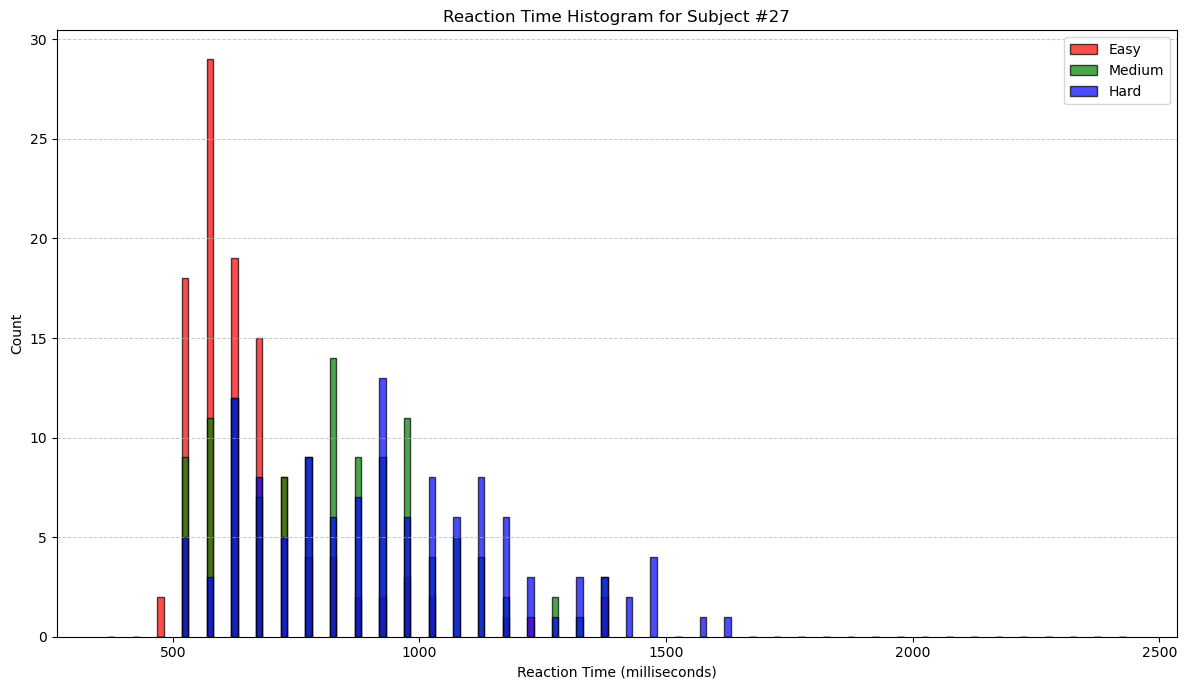

In [6]:
plot_histogram_for_subject(27, data)

In [7]:
def plot_reaction_time_means_with_error(data):
    # Define the conditions
    conditions = ['Easy', 'Medium', 'Hard']
    
    # Lists to store means and standard deviations
    means_correct = []
    std_devs_correct = []
    means_incorrect = []
    std_devs_incorrect = []
    
    # Calculate means and standard deviations for each condition
    for condition in conditions:
        condition_data_correct = data[(data['Condition'] == condition) & (data['Correct'] == 1)]["ReactionTime"]
        condition_data_incorrect = data[(data['Condition'] == condition) & (data['Correct'] == 0)]["ReactionTime"]

        means_correct.append(condition_data_correct.mean())
        std_devs_correct.append(condition_data_correct.std())
        means_incorrect.append(condition_data_incorrect.mean())
        std_devs_incorrect.append(condition_data_incorrect.std())

    # Plotting
    width = 0.35  # Width of the bars
    x = np.arange(len(conditions))  # Label locations

    plt.figure(figsize=(12, 7))
    
    bars_correct = plt.bar(x - width/2, means_correct, width, yerr=std_devs_correct, label='Correct', color='green', capsize=10)
    bars_incorrect = plt.bar(x + width/2, means_incorrect, width, yerr=std_devs_incorrect, label='Incorrect', color='red', capsize=10)

    # Adding labels, title and legend
    plt.xlabel('Condition')
    plt.ylabel('Mean Reaction Time (milliseconds)')
    plt.title('Mean Reaction Time with Standard Deviation Error Bars')
    plt.xticks(x, conditions)
    plt.legend()
    
    plt.tight_layout()
    plt.show()



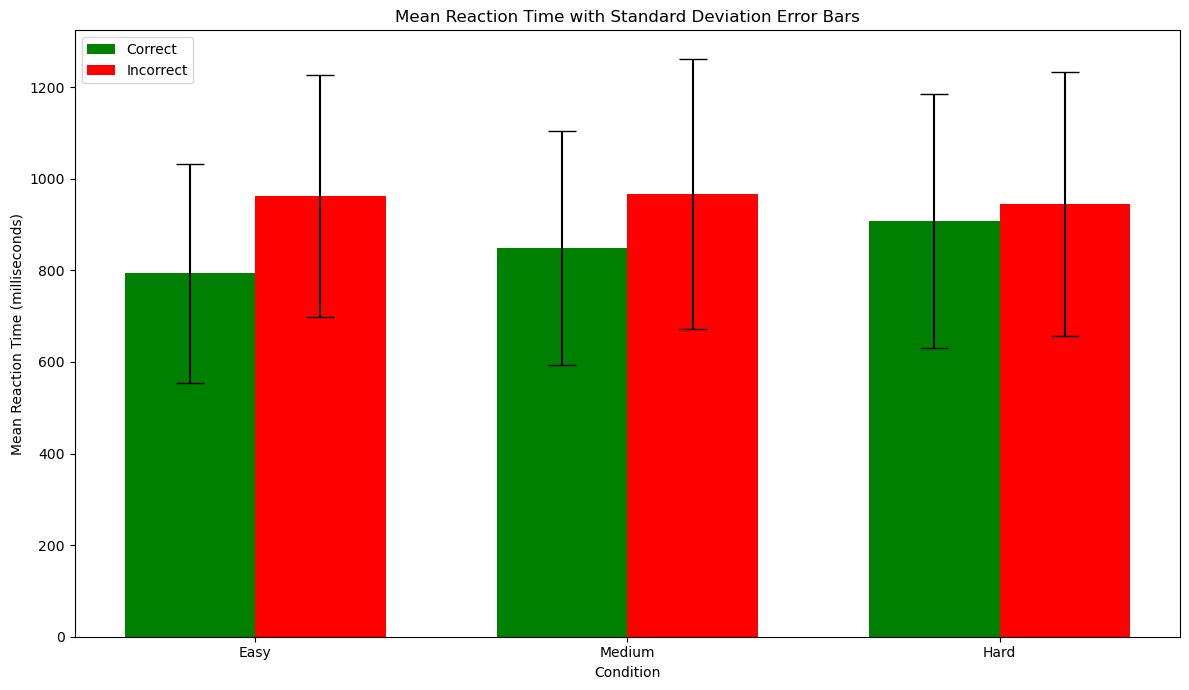

In [8]:
# Call the function
plot_reaction_time_means_with_error(data)

### Problem 6 
#### a. Calculate the mean reaction time for each subject in each condition.  
#### b. Make a histogram that shows the distribution of mean RT across subjects,showing all 3 conditions in a single graph.  
#### c.  Repeat (b) for the 25%, 50%, and 75%. Do the graphs show the same differences between conditions? 
#### d. Calculate the accuracy for each subject in each condition (accuracy is the proportion they get correct).  Visualize the accuracy in each condition for all the subjects in 1 graph.  
#### d.  What is your qualitiative opinion on the differences in reaction time and accuracy between conditions and subjects.   

In [9]:
means = data.groupby(['Subject', 'Condition'])['ReactionTime'].mean().reset_index()
print(means)

     Subject Condition  ReactionTime
0          1      Easy   1129.513514
1          1      Hard   1125.193548
2          1    Medium   1044.485294
3          2      Easy    756.562500
4          2      Hard    859.818182
..       ...       ...           ...
97        33      Hard   1091.389381
98        33    Medium   1089.962617
99        34      Easy    718.462264
100       34      Hard    708.780702
101       34    Medium    822.466102

[102 rows x 3 columns]


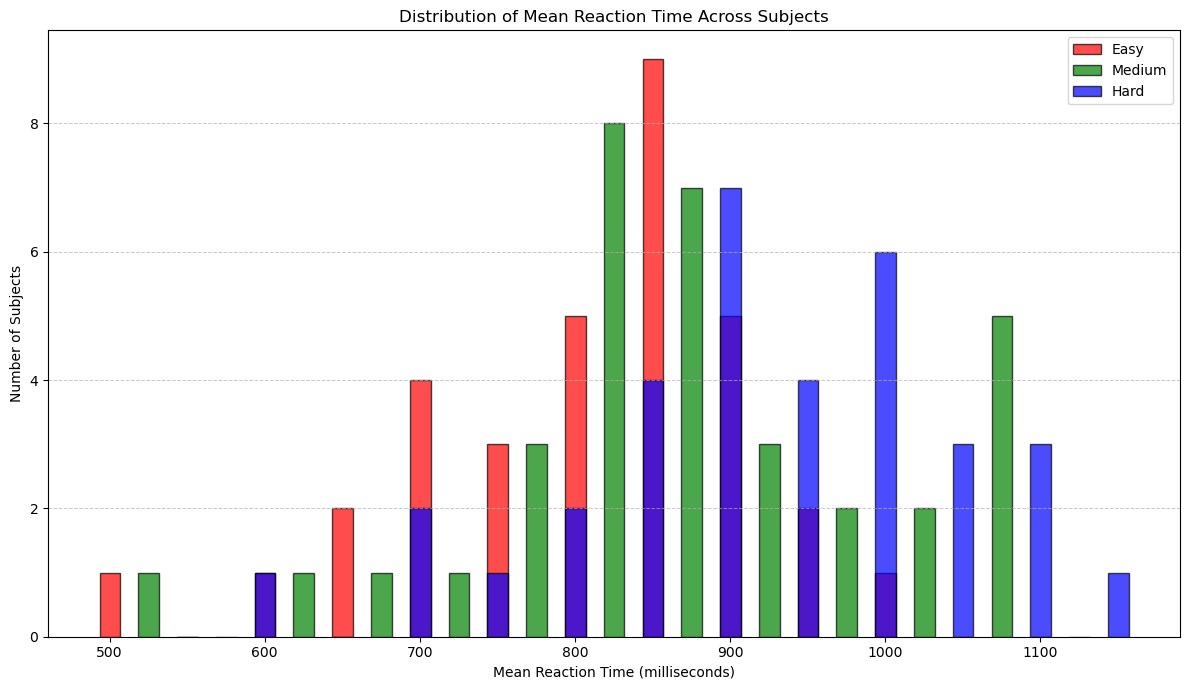

In [10]:
# Define the conditions and colors
conditions = ["Easy", "Medium", "Hard"]
colors = ['red', 'green', 'blue']

# Determine the bins
bin_width = 50
bins = np.arange(means['ReactionTime'].min(), means['ReactionTime'].max() + bin_width, bin_width)

# Plotting the histograms
plt.figure(figsize=(12, 7))
for index, (condition, color) in enumerate(zip(conditions, colors)):
    subset = means[means["Condition"] == condition]["ReactionTime"]
    adjusted_bins = bins + (index - 1) * bin_width/2
    plt.hist(subset, bins=adjusted_bins, label=condition, alpha=0.7, edgecolor='black', color=color, align='mid', rwidth=0.8/len(conditions))

# Setting title, labels, and other aesthetics
plt.title("Distribution of Mean Reaction Time Across Subjects")
plt.xlabel("Mean Reaction Time (milliseconds)")
plt.ylabel("Number of Subjects")
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()


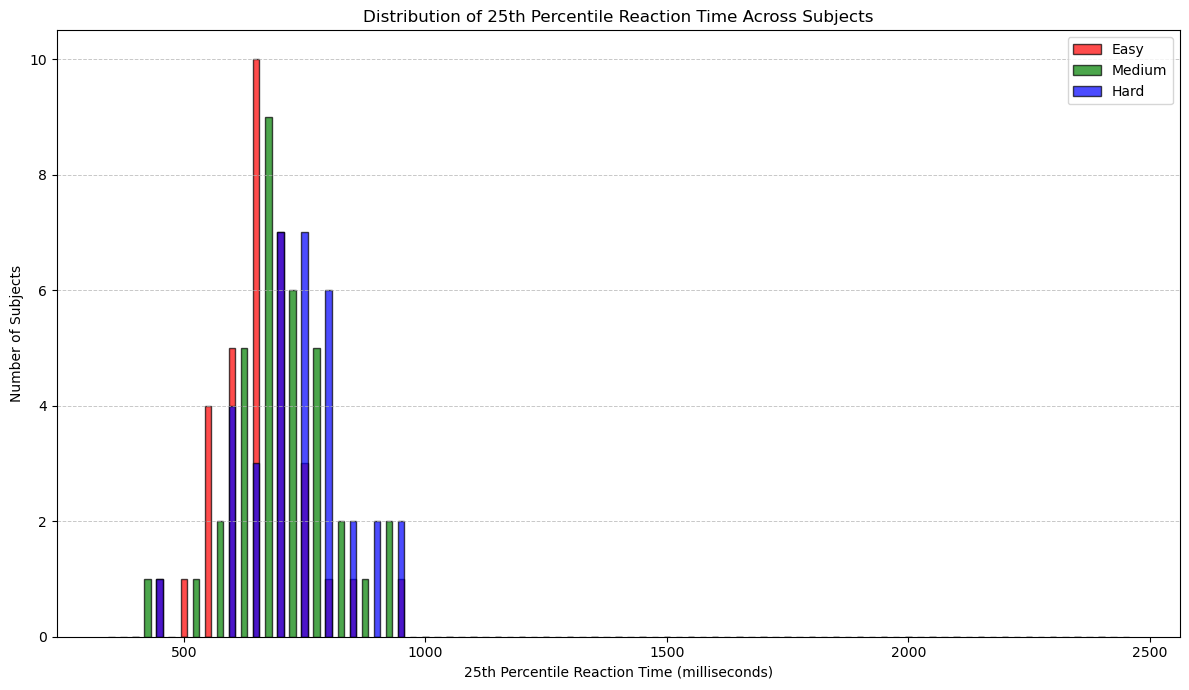

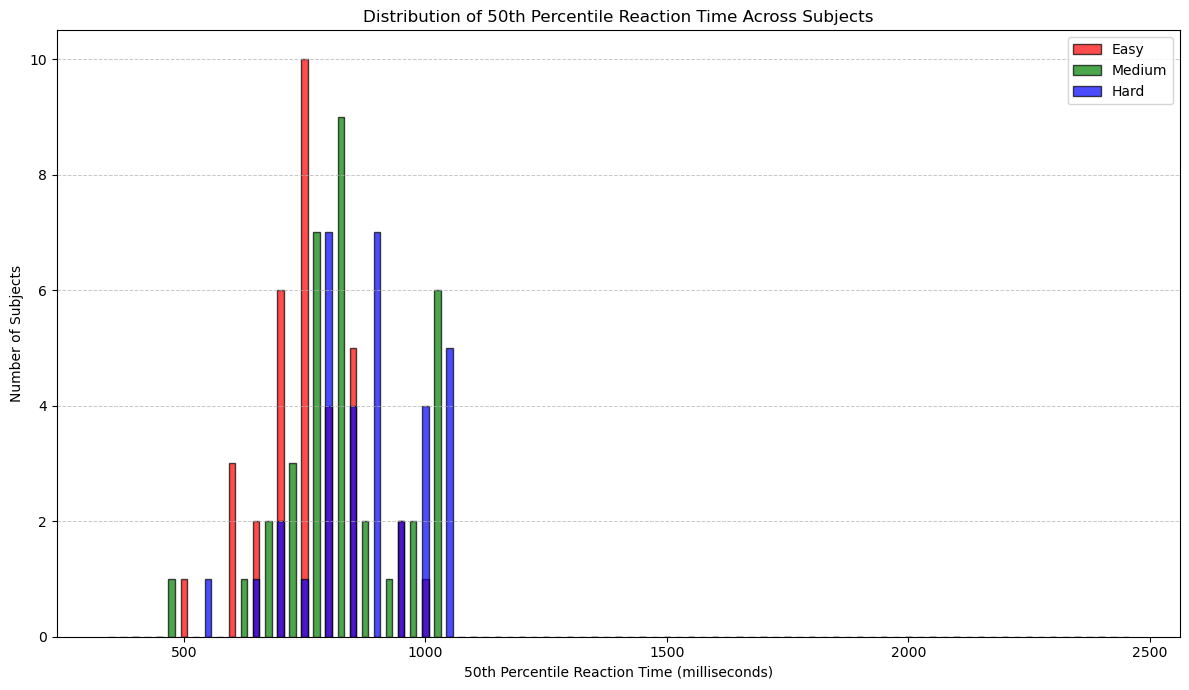

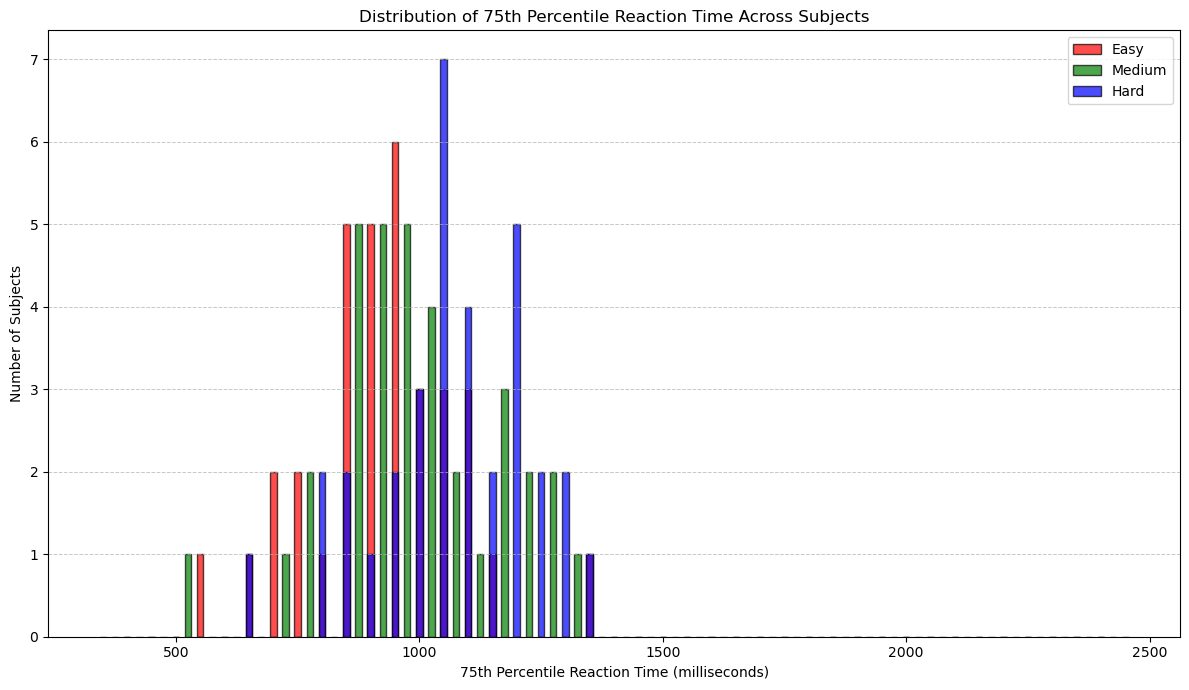

In [11]:
# Define the conditions and colors
conditions = ["Easy", "Medium", "Hard"]
colors = ['red', 'green', 'blue']

percentiles = [25, 50, 75]

# Determine the bins for entire dataset to make sure all plots have same scale
bin_width = 50
bins = np.arange(data['ReactionTime'].min(), data['ReactionTime'].max() + bin_width, bin_width)

for percentile in percentiles:
    # Calculate the desired percentile for each subject in each condition.
    quantiles = data.groupby(['Subject', 'Condition'])['ReactionTime'].apply(lambda x: np.percentile(x, percentile)).reset_index()

    # Plotting the histograms
    plt.figure(figsize=(12, 7))
    for index, (condition, color) in enumerate(zip(conditions, colors)):
        subset = quantiles[quantiles["Condition"] == condition]["ReactionTime"]
        adjusted_bins = bins + (index - 1) * bin_width/2
        plt.hist(subset, bins=adjusted_bins, label=condition, alpha=0.7, edgecolor='black', color=color, align='mid', rwidth=0.8/len(conditions))

    # Setting title, labels, and other aesthetics
    plt.title(f"Distribution of {percentile}th Percentile Reaction Time Across Subjects")
    plt.xlabel(f"{percentile}th Percentile Reaction Time (milliseconds)")
    plt.ylabel("Number of Subjects")
    plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.show()



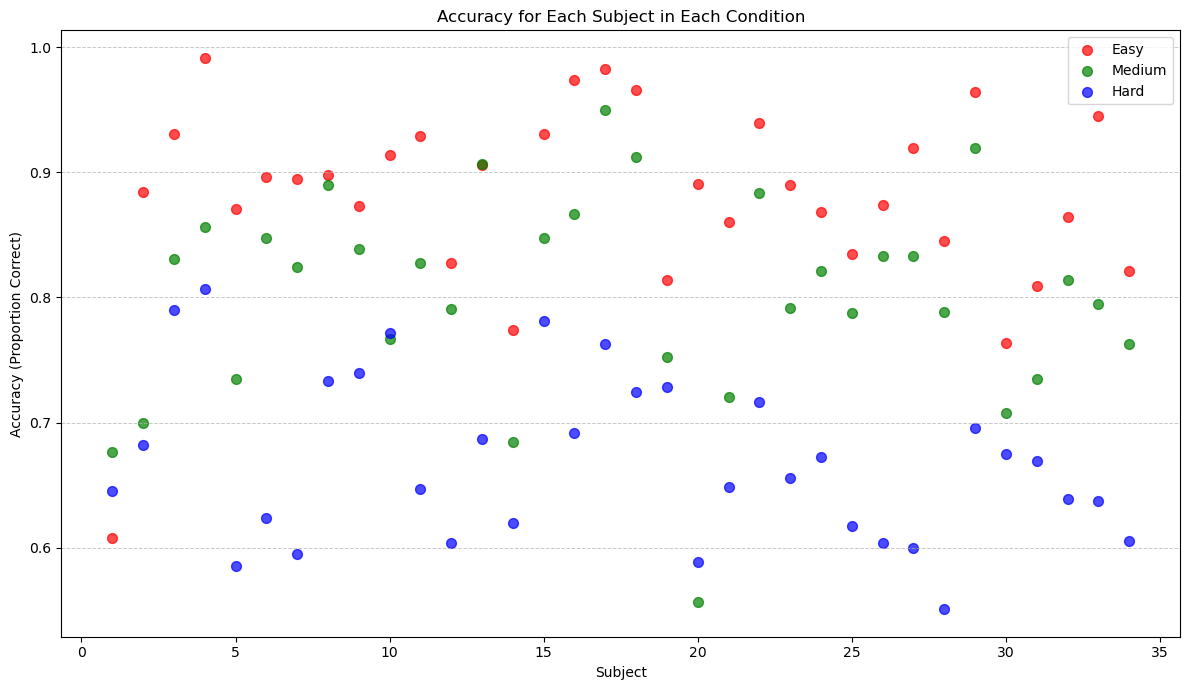

In [12]:
# Calculate accuracy for each subject in each condition
grouped_data = data.groupby(['Subject', 'Condition'])
accuracy_data = grouped_data.apply(lambda x: x['Correct'].sum() / len(x)).reset_index(name='Accuracy')

# Visualize the accuracy
plt.figure(figsize=(12, 7))

conditions = ['Easy', 'Medium', 'Hard']
colors = ['red', 'green', 'blue']

for color, condition in zip(colors, conditions):
    condition_data = accuracy_data[accuracy_data['Condition'] == condition]
    plt.scatter(condition_data['Subject'], condition_data['Accuracy'], label=condition, color=color, alpha=0.7, s=50)

plt.title("Accuracy for Each Subject in Each Condition")
plt.xlabel("Subject")
plt.ylabel("Accuracy (Proportion Correct)")
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
